In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.integrators import *
from scripts.plotting import plot_energy_behaviour_SIR

In [2]:
def SIR(t,y):
        
    beta,gamma,N = 0.1,0.1,1.

    if len(y.shape)==2:
        y1,y2,y3 = y[0:1],y[1:2],y[2:3]
        return np.concatenate((
            -beta*y2*y1/N,
            beta*y1*y2/N - gamma*y2,
            gamma*y2
        ),axis=0)
    else:
        y1,y2,y3 = y[0],y[1],y[2]
        return np.array([
            -beta*y2*y1/N,
            beta*y1*y2/N - gamma*y2,
            gamma*y2
        ])

In [3]:
t0 = 0.
tmax = 100
N = 1000
t_eval = np.linspace(t0,tmax,N)
y0 = np.array([0.3,0.5,0.2])

solnEE = integrate_with_explicit_euler(y0,SIR,t_eval) #Solution with Explicit Euler
solnIE = integrate_with_implicit_euler(y0,SIR,t_eval) #Solution with Implicit Euler
solnRK45 = integrate_with_rk45(y0,SIR,t_eval,tol=1e-2) #Solution with RK45
solnIMP = integrate_with_implicit_midpoint(y0,SIR,t_eval) #Solution with Implicit Midpoint

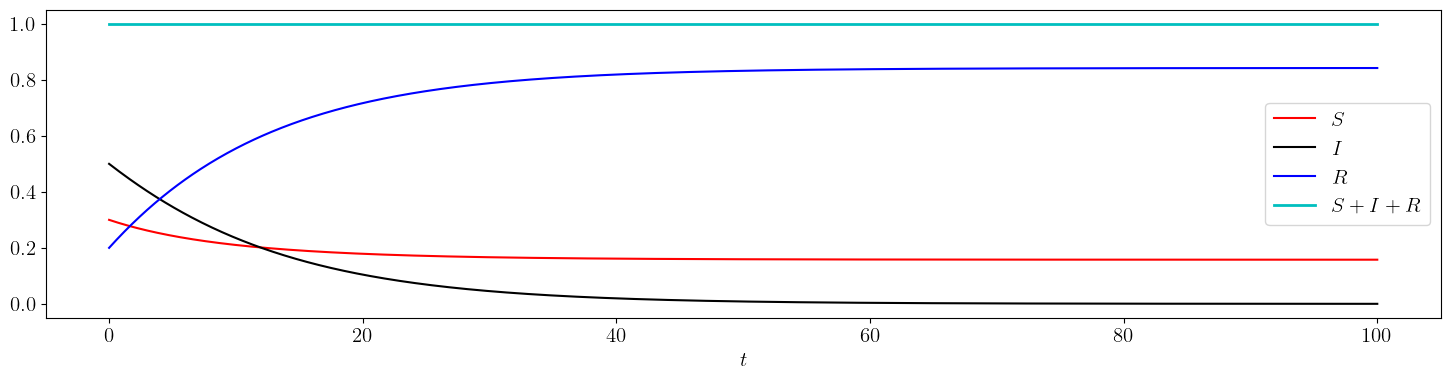

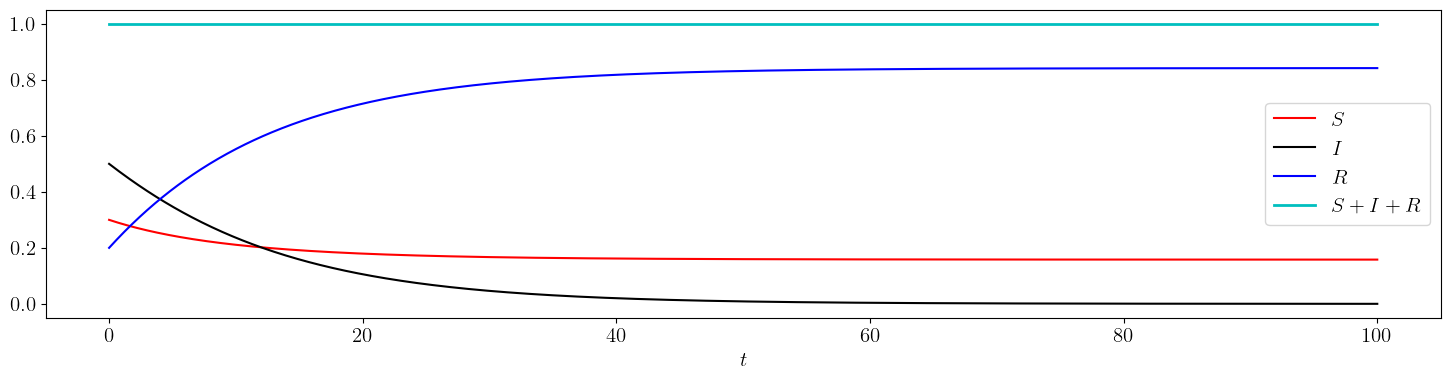

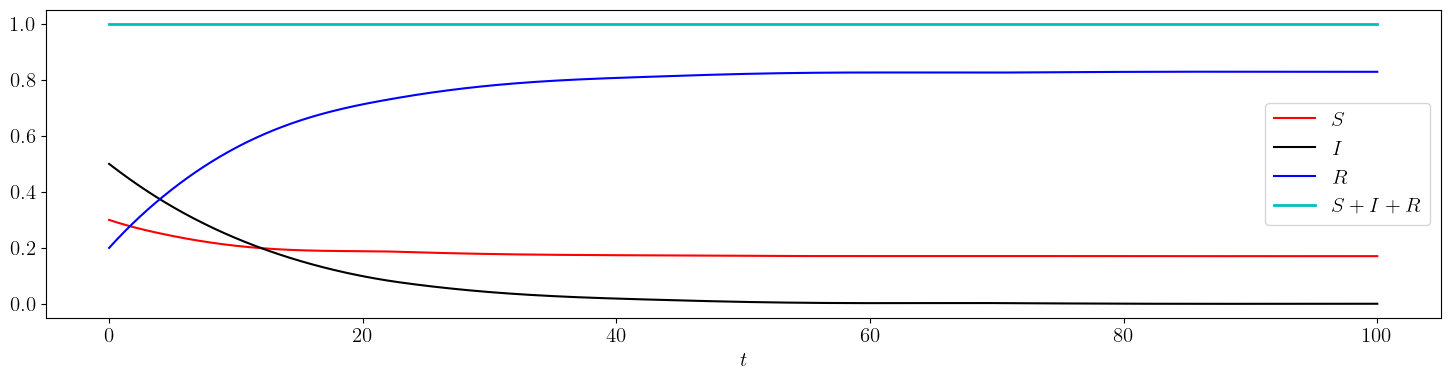

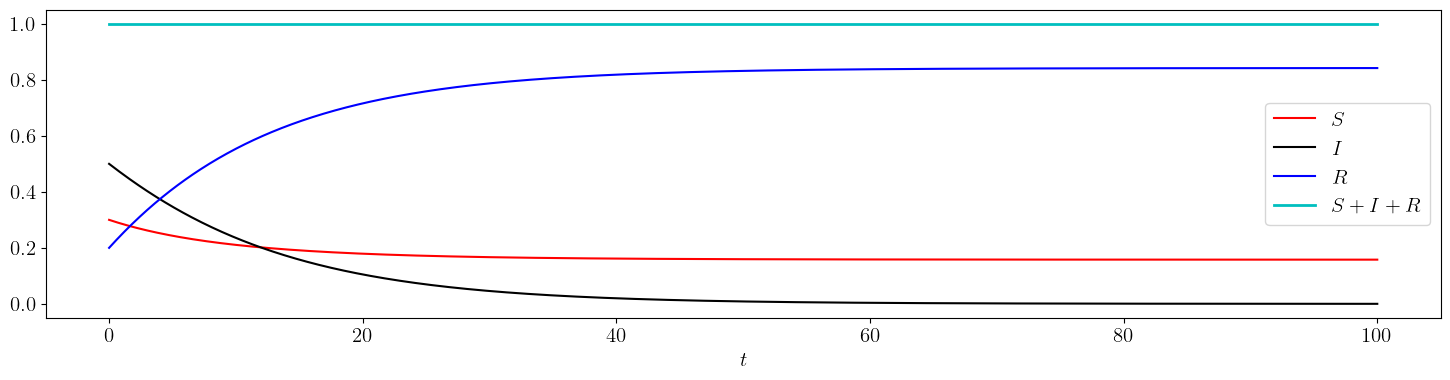

In [21]:
plot_energy_behaviour_SIR(solnEE,t_eval,method="Explicit Euler")
plot_energy_behaviour_SIR(solnIE,t_eval,method="Implicit Euler")
plot_energy_behaviour_SIR(solnRK45,t_eval,method="RK45")
plot_energy_behaviour_SIR(solnIMP,t_eval,method="Implicit Midpoint")